### This file is for testing a duckdb solution

In [4]:
# ChatGPT Example

import duckdb
import pandas as pd
import psycopg2

# PostgreSQL Connection Details
PG_CONN = "dbname='mydb' user='myuser' password='mypassword' host='localhost' port='5432'"

# Connect DuckDB to PostgreSQL
con = duckdb.connect()
con.execute(f"INSTALL postgres; LOAD postgres;")

# Register PostgreSQL table in DuckDB (Lazy Loading)
con.execute(f"""
    CREATE VIEW my_data AS 
    SELECT * FROM postgres_scan('{PG_CONN}', 'public.my_table')
""")


from sklearn.cluster import KMeans
import numpy as np

# Custom clustering function
def cluster_price(value):
    return "Low" if value < 250 else "High"

# Register the UDF in DuckDB
con.create_function("Cluster", cluster_price, returns="VARCHAR")

# Query PostgreSQL data with transformation applied dynamically
result = con.execute("SELECT id, price, Cluster(price) AS price_cluster FROM my_data").fetchdf()

print(result)

# Load data from PostgreSQL into Pandas
df = con.execute("SELECT price FROM my_data").fetchdf()

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df[['price']])

# Register the result dynamically in DuckDB
con.register('clustered_df', df)

# Query with the new cluster information
result = con.execute("SELECT * FROM clustered_df").fetchdf()
print(result)



ParserException: Parser Error: syntax error at or near "mydb"

[
  [
    1200.5,
    899.99,
    499,
    199.99,
    149.99,
    399.99,
    299.99,
    89.99,
    49.99,
    179.99
  ]
]
      clts
0  1200.50
1   899.99
2   499.00
3   199.99
4   149.99
5   399.99
6   299.99
7    89.99
8    49.99
9   179.99


/tmp/ipykernel_67696/2108598865.py:21: DeprecationWarning: numpy.core is deprecated and has been renamed to numpy._core. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.multiarray.
  con.create_function("Cluster", cluster_price, [float,float], float, type='arrow')


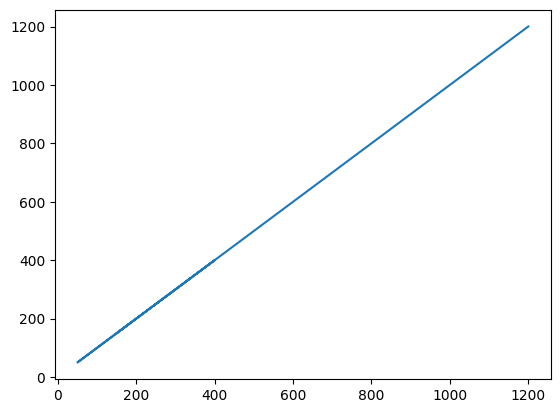

In [1]:
import duckdb
import duckdb.typing
import pandas as pd
import psycopg2

PG_CONN = 'host=localhost port=5432 user=postgres password=password dbname=example'

con = duckdb.connect()
con.execute(f"INSTALL postgres_scanner; LOAD postgres_scanner; CALL postgres_attach('{PG_CONN}')")

from visualizations import Visualization

vis = Visualization()

def cluster_price(value, teste="TestingString"):
    print(value)
    vis.lineplot(value,value)
    return value

from typing import Union
con.create_function("Cluster", cluster_price, [float,float], float, type='arrow')

result = con.execute("WITH teste as (SELECT id, Cluster(price,price) as clts from products) SELECT clts from teste;").fetchdf()
print(result)




In [ ]:
import duckdb
import duckdb.typing
import pandas as pd
import psycopg2

PG_CONN = 'host=localhost port=5432 user=postgres password=password dbname=example'

con = duckdb.connect()
con.execute(f"INSTALL postgres_scanner; LOAD postgres_scanner; CALL postgres_attach('{PG_CONN}')")

from ml import MachineLearning

ml_class = MachineLearning()

def cluster_price(value: list) -> float:
    print(value)
    res = ml_class.cluster_kmeans(value)
    return res

from typing import Union
from duckdb.typing import DuckDBPyType
from pyarrow import types
# Dinamizar para que primeiro ele leia a query pra saber os tipos??

con.create_function("Cluster", cluster_price, [float, float], float, type="arrow")

result = con.execute("WITH teste as (SELECT Cluster(price, price) as clts from products) SELECT clts from teste;").fetchdf()
print(result)

# Maybe with map??



InvalidInputException: Invalid Input Error: 2 types provided, but the provided function takes 1 parameters

# The following notebook is the main solution using DuckDB

In [2]:
from duck_solution import EngineDuck

engine = EngineDuck(host='localhost',port='5432',name='postgres',user='postgres',password='password')
engine.registerAllVisualizeFunctions()


# engine.runQuery("WITH teste as (SELECT id, WORDCLOUD(product_name) as clts from products) SELECT clts from teste;")

True

{'electability': 1.0, 'joe': 0.5, 'biden': 0.5, 'urges': 0.5, 'national': 0.5, 'unity': 0.5, 'speech': 0.5, 'renewed': 0.5, 'cancer': 0.5, 'moonshot': 0.5, 'sen': 0.5, 'tim': 0.5, 'scott': 0.5, 'downplays': 0.5, 'concerns': 0.5, 'struggling': 0.5, 'senate': 0.5, 'gop': 0.5, 'candidates': 0.5, 'ballot': 0.5, 'key': 0.5, 'rhode': 0.5, 'island': 0.5, 'house': 0.5, 'primary': 0.5}


,wordcloud(word)
0,Joe Biden Urges National Unity In Speech On Re...
1,Sen. Tim Scott Downplays Electability Concerns...
2,Electability Is On The Ballot In Key Rhode Isl...


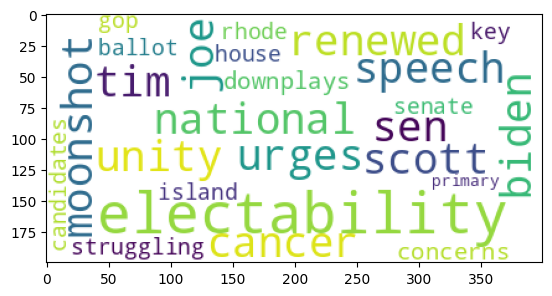

In [5]:
engine.runQuery(""" 
WITH findEvent AS ( 
    SELECT title AS word 
    FROM event e, date d, content c
    WHERE e.dateID = d.dateID AND e.contentid = c.contentid AND
          fullDate = '2022-09-13'
) SELECT WORDCLOUD(word) FROM findEvent;
""")

In [ ]:
engine.runQuery(""" 

WITH findEvent AS ( 
    SELECT title AS word 
    FROM event e, date d, content c
    WHERE e.dateID = d.dateID AND e.contentid = c.contentid AND
          fullDate = '2022-09-13'
), countWords AS ( 
    SELECT regexp_split_to_table(word, ' ') AS wordToken FROM findEvent
), frequency as (
    SELECT wordToken, COUNT(*) as total FROM countWords GROUP BY wordToken
)
SELECT HBAR(wordToken, total) from frequency 

""")

# THIS KINDA WORKS!!! THE PROBABLE CAUSE IS THE CHUNKED ARRAY BIT

,wordToken,total
0,Scott,1
1,GOP,1
2,Biden,1
3,Candidates,1
4,The,1
5,Senate,1
6,Key,1
7,In,2
8,Renewed,1
9,Island,1


In [6]:
[True]*10

[True, True, True, True, True, True, True, True, True, True]

### Testing similarity stuff

In [ ]:
import duckdb
import duckdb.typing
import pandas as pd
import psycopg2

PG_CONN = 'host=localhost port=5432 user=postgres password=password dbname=example'

con = duckdb.connect()
con.execute(f"INSTALL postgres_scanner; LOAD postgres_scanner; CALL postgres_attach('{PG_CONN}')")

from ml import MachineLearning

ml_class = MachineLearning()

def cluster_price(*args) -> float:
    print(args)
    # res = ml_class.cluster_kmeans(value)
    return args

from typing import Union
from duckdb.typing import DuckDBPyType
from pyarrow import types
# Dinamizar para que primeiro ele leia a query pra saber os tipos??

con.create_function("Cluster", cluster_price, parameters=None, return_type=float, type="arrow")
# YAYYYYY THIS WORKS!! eu posso passar como LISTA INDIVIDUAL MESMO, cada row vai ser um [rowA1, rowB1], [rowA2]
result = con.execute("WITH teste as (SELECT Cluster([price,price]) as clts from products) SELECT clts from teste;").fetchdf()
print(result)

# Maybe with map??

# eu posso definir e nao fazer um check, no maximo type check, mas order check nao



(<pyarrow.lib.ChunkedArray object at 0x738eec9f3760>
[
  [
    [
      1200.50,
      1200.50
    ],
    [
      899.99,
      899.99
    ],
    ...
    [
      49.99,
      49.99
    ],
    [
      179.99,
      179.99
    ]
  ]
],)


InvalidInputException: Invalid Input Error: Could not convert the result into an Arrow Table

In [5]:
def a(*args):
    print(args)

a(3,2,1)

(3, 2, 1)
